# ML Balanced

In [ ]:
# !pip install scikit-learn-extra

  Obtaining dependency information for scikit-learn-extra from https://files.pythonhosted.org/packages/22/2f/86f58cb2bd3f81bdb28555470761c27c0d62a566329aac70e8507cb744fd/scikit_learn_extra-0.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/340.5 kB ? eta -:--:--
   -- ------------------------------------ 20.5/340.5 kB 330.3 kB/s eta 0:00:01
   -------- ------------------------------ 71.7/340.5 kB 563.7 kB/s eta 0:00:01
   ------------------------------ --------- 256.0/340.5 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 340.5/340.5 kB 1.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

## Dataset 1: Balanced - stroke_data

In [4]:
df = pd.read_csv('C:/Users/gabri/Downloads/Diabetes/stroke_data.csv')
print(df.shape)
df.head()

(40910, 11)


sex   age  hypertension  heart_disease  ever_married  work_type  \
0  1.0  63.0             0              1             1          4   
1  1.0  42.0             0              1             1          4   
2  0.0  61.0             0              0             1          4   
3  1.0  41.0             1              0             1          3   
4  1.0  85.0             0              0             1          4   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               0       1  
2               1             171.23  34.4               1       1  
3               0             174.12  24.0               0       1  
4               1             186.21  29.0               1       1

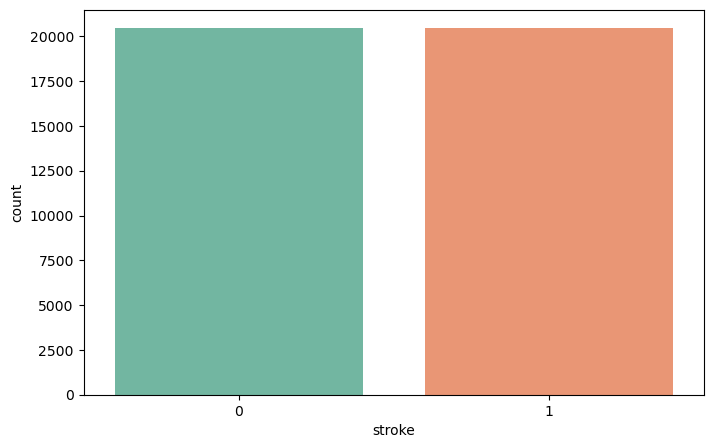

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='stroke', data=df, palette='Set2')
plt.show()

In [6]:
df.shape

(40910, 11)

### Preprocessing:

#### Handle missing values

In [7]:
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.isna().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df['sex']=df['sex'].ffill()

df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Outlier Detection

In [10]:
import plotly.express as px

for col in df.columns:
    fig=px.box(df,y=df[col])
    fig.show()

#### Removing Outliers

In [11]:
columns_to_check = ['hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'avg_glucose_level', 'bmi']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.0 * IQR   
    upper = Q3 + 1.0 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [12]:
import plotly.express as px

for col in df.columns:
    fig=px.box(df,y=df[col])
    fig.show()

### Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1) 
y = df['stroke']             


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Set:", X_train.shape)
print("Test Set:", X_test.shape)

Train Set: (13708, 10)
Test Set: (3427, 10)


### Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

X = df.drop('stroke', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply Assigned Models

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print("KMeans Silhouette Score:", kmeans_score)

KMeans Silhouette Score: 0.1547024531589662


In [16]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=2, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

kmedoids_score = silhouette_score(X_scaled, kmedoids_labels)
print("KMedoids Silhouette Score:", kmedoids_score)

KMedoids Silhouette Score: 0.10592473604608768


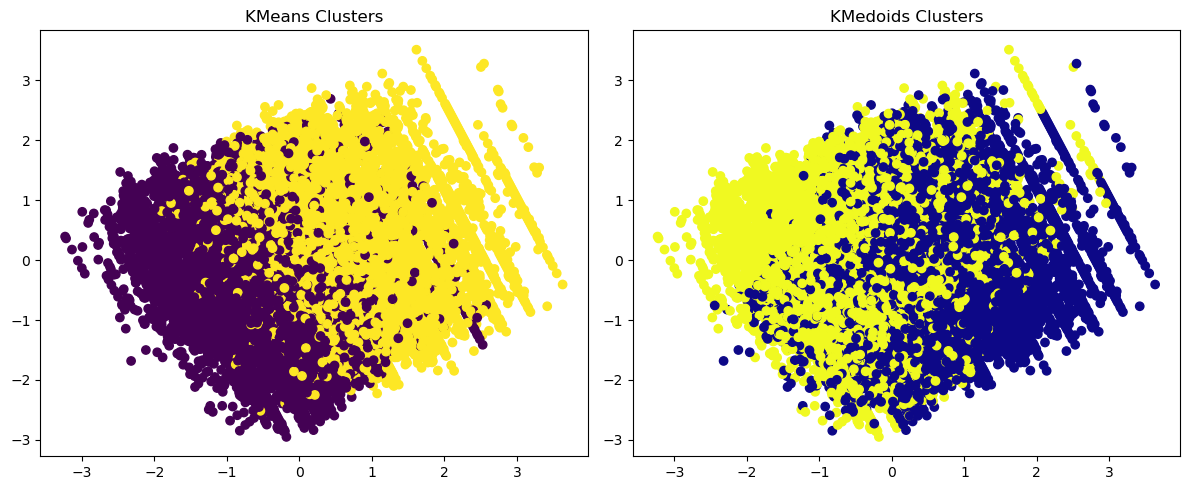

In [17]:


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
ax[0].set_title("KMeans Clusters")

ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='plasma')
ax[1].set_title("KMedoids Clusters")

plt.tight_layout()
plt.show()

